# ML: Supervised algorithm - Ensemble - Random Forest - Top-Selling Shops

## Introduction

We want to predict that there will be a high volume of baby car seat sales. For this, we will rely on the ISLR Carseats dataset that we can download from the statsmodels library.

## 1. Import of libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Let's start by preparing our working environment by loading the necessary libraries to solve our problem. This time, we are going to develop the problem using the random forest algorithm, so we will need the RandomForestClassifier function from the sklearn package. 

## 2. Load datasets

In [2]:
# Generate data for the classification problem
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")

# Dataset description
dataset = carseats.data
print(carseats.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

Download the dataset associated with the ISLR Carseats problem from the statsmodels.api package.

## 3. Dataset analysis

In [3]:
# Explorar dataset 
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Using the head() command we do an exploratory analysis of our data, visualising the first 5 rows of the dataset.

In [4]:
# Create the variable 'target' with which we will do the classification.
dataset['target'] = np.where(dataset.Sales > 8, 0, 1)

# Eliminate the variable 'Sales' so as not to duplicate information.
dataset.drop(columns = 'Sales', inplace=True)

In [5]:
# Verify variable has been created correctly.
dataset.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,target
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,1


As we saw in the decision tree case study, we need to create the model's target variable. This variable will separate the sales considered high from the rest. For this problem, sales are considered high when a shop exceeds 8,000 items in the Sales variable (remember that the data in the column is considered in thousands).

## 4. Models training

In [6]:
# Separate independent and dependent variables 
X = dataset.drop('target', axis=1)
y = dataset.target

Separate the predictor variables from the independent variable by creating the X and y datasets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size    = 0.30,
                                                    random_state = 1234,
                                                    shuffle      = True)

Create our train and test dataset that we will use later to evaluate the model. On this occasion, we will leave 30% of the samples for the test.

In [8]:
# One-hot-encoding de las variables categóricas

# We identify numerical and categorical variables
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# We define the one-hot-encoding transformation to the categorical variables
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],remainder='passthrough')

Like the DecisionTreeClassifier function, the RandonForestClassifier function does not support untransformed categorical variables. Remember that this limitation is not associated with the algorithm, but rather with the way sklearn processes the data. 

__Further information__: there are other python libraries for solving random forest that do not require this transformation, such as H20.
You can check the documentation in the following link:

* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html

In [9]:
# Apply the one-hot-encoding transformation to our dataset. 
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# Name of all columns
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([encoded_cat,numeric_cols])

# Conversion to dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)

Define the transformation using the train dataset and then apply it to both the train and test datasets. 

### Model 1

In [10]:
# Initialising the model using the default parameters 
rforest_model = RandomForestClassifier(random_state = 1234, max_depth = 20)

# Fitting the model to the data
rforest_model.fit(X_train_prep, y_train)

RandomForestClassifier(max_depth=20, random_state=1234)

Finally, we define our random forest model. Here, we set as usual the random sampling seed and limit the tree depth to 20 using the hyperparameter max_depth.

__Further information__: you can check the list of hyperparameters available for RandonForestClassifier at the following link
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Among all the hyperparameters available, we can highlight above all those associated with limiting the growth of the tree and those that control the number of estimators or trees. 

* n_estimator: sets the number of trees (or experts) that we will use for training.
* min_samples_leaf: is the minimum number of observations a leaf should have. 
* max_features: is the maximum number of predictor variables we will consider for each tree. Note that as we use random sampling, it could be the case that we use different variables for different trees, which would help us to reduce the bias in the prediction. 
* ccp_alpha: associated with the regularisation parameter. Remember that this parameter penalises the complexity of the tree associated with the number of nodes created. 

In [11]:
# Predictions
y_pred_train = rforest_model.predict(X_train_prep)
y_pred_test = rforest_model.predict(X_test_prep)

# Model info.
print("Nº of trees (estimators):", len(rforest_model.estimators_))
print("Train model predictio:", accuracy_score(y_train, y_pred_train, normalize=True))
print("Test model predictio:", accuracy_score(y_test, y_pred_test, normalize=True))

Nº of trees (estimators): 100
Train model predictio: 1.0
Test model predictio: 0.8833333333333333


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.89      0.93      0.91        76

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.88       120



Make the prediction for the test and train set and compare the metrics. 

In this case, with 100 trees used as estimators, we obtain an accuracy of 100% in the train set and 83% in the test set. As we do not want our algorithm to overfit the train data, we will apply some of the hyperparameters we have seen to limit the size of the tree.

### Model 2

In [13]:
# Initialising the model using the default parameters 
rforest_model_2 = RandomForestClassifier(random_state = 1234, max_depth = 5, n_estimators= 7)

# Fitting the model to the data
rforest_model_2.fit(X_train_prep, y_train)

RandomForestClassifier(max_depth=5, n_estimators=7, random_state=1234)

On this occasion, we are going to try limiting the number of trees to be trained and setting their maximum depth to 5 (max_depth).

In [14]:
# Predictions
y_pred_train = rforest_model_2.predict(X_train_prep)
y_pred_test = rforest_model_2.predict(X_test_prep)

# Model info.
print("Nº of trees (estimators):", len(rforest_model_2.estimators_))
print("Train model predictio:", accuracy_score(y_train, y_pred_train, normalize=True))
print("Test model predictio:", accuracy_score(y_test, y_pred_test, normalize=True))

Nº of trees (estimators): 7
Train model predictio: 0.9214285714285714
Test model predictio: 0.8583333333333333


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.90      0.87      0.89        76

    accuracy                           0.86       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



Verifying the results by making the prediction in both train and test where we found that with only 7 trees, we are able to find a good approximation, an accuracy of 92% in the train and 85% in the test.

__Please note__: remember that for the random forest algorithm, increasing the number of estimators does not always improve the metric as it reaches a point where it stabilises. Think about the following example, if we are voting between class A and class B with a group of experts, if we obtain A as the final result, indiscriminately increasing the number of experts does not make class A more certain.

C:\Users\joaqu\anaconda3\envs\Data_Science\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\joaqu\anaconda3\envs\Data_Science\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\joaqu\anaconda3\envs\Data_Science\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\joaqu\anaconda3\envs\Data_Science\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\joaqu\anaconda3\envs\Data_S

Optimal value of n_estimators: 21
Optimal test accuracy: 0.8583333333333333


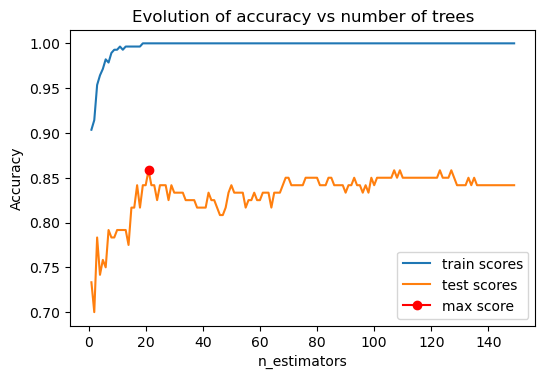

In [16]:
# Function for estimating the number of optimal estimators  
#--------------------------------------------------------
train_scores = []
test_scores = []

# Range of estimators 
estimator_range = range(1, 150, 1)

# Loop to train a model with each value of n_estimators and extract its error 
for n_estimators in estimator_range:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'gini',
                max_depth    = 10,
                max_features = 'auto',
                oob_score    = True,
                random_state = 1234
             )
    modelo.fit(X_train_prep, y_train)
    y_pred_train = modelo.predict(X_train_prep)
    train_scores.append(accuracy_score(y_train, y_pred_train, normalize=True))
    y_pred_test = modelo.predict(X_test_prep)
    test_scores.append(accuracy_score(y_test, y_pred_test, normalize=True))
    
# Visualisation showing the evolution of errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, test_scores, label="test scores")
ax.plot(estimator_range[np.argmax(test_scores)], max(test_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of accuracy vs number of trees")
plt.legend();
print(f"Optimal value of n_estimators: {estimator_range[np.argmax(test_scores)]}")
print(f"Optimal test accuracy: {max(test_scores)}")

As we can see, we notice that the metric improves as we include more estimators in the model. However, after a certain number (around 20 trees) the metric stabilises, with little difference observed.  

Finally, with this configuration we have found that the best random forest model is the one with 21 trees, obtaining 85.83% accuracy. 